In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  


In [5]:
df =  pd.read_csv("C:\\Users\\Aditya Mishra\\Downloads\\StudentsPerformance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape  

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:

for values in df.columns : 
    for unique_val in df[values].unique() : 
        if(df[values].dtype == 'object'):
            print(unique_val)
        else : 
            break
    print("__________________________")

female
male
__________________________
group B
group C
group A
group D
group E
__________________________
bachelor's degree
some college
master's degree
associate's degree
high school
some high school
__________________________
standard
free/reduced
__________________________
none
completed
__________________________
__________________________
__________________________
__________________________


In [13]:
#the empty columns denote the no. of numeric columns more expalinably  : 
numeric_features = [feature for feature in df.columns if df[feature].dtype != "object"] 
categorical_features = [feature for feature in df.columns if df[feature].dtype == "object"] 

print("We have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Visuals 

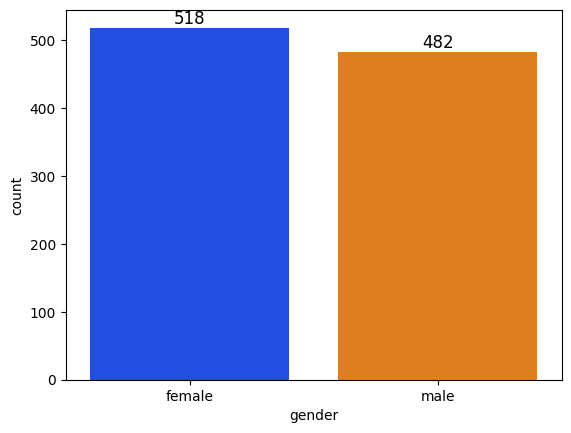

In [14]:
ax= sns.countplot(x=df['gender'],data=df,palette ='bright',hue=df['gender'])
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, color="black")

plt.show()

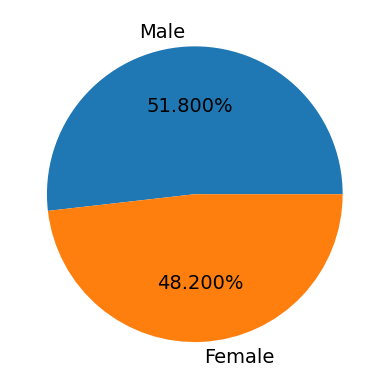

In [15]:
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%.3f%%',textprops={'fontsize': 14})
plt.show()

In [16]:
df['race/ethnicity'].value_counts().index

Index(['group C', 'group D', 'group B', 'group E', 'group A'], dtype='object', name='race/ethnicity')

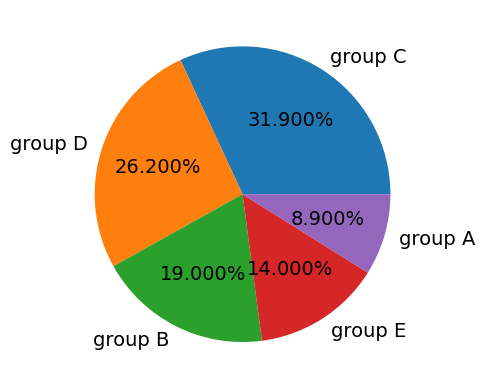

In [17]:
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,autopct='%.3f%%',textprops={'fontsize': 14})
plt.show()

C:\Users\Aditya Mishra\AppData\Local\Temp\ipykernel_5156\3735419436.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["parental level of education"], palette = 'Blues')


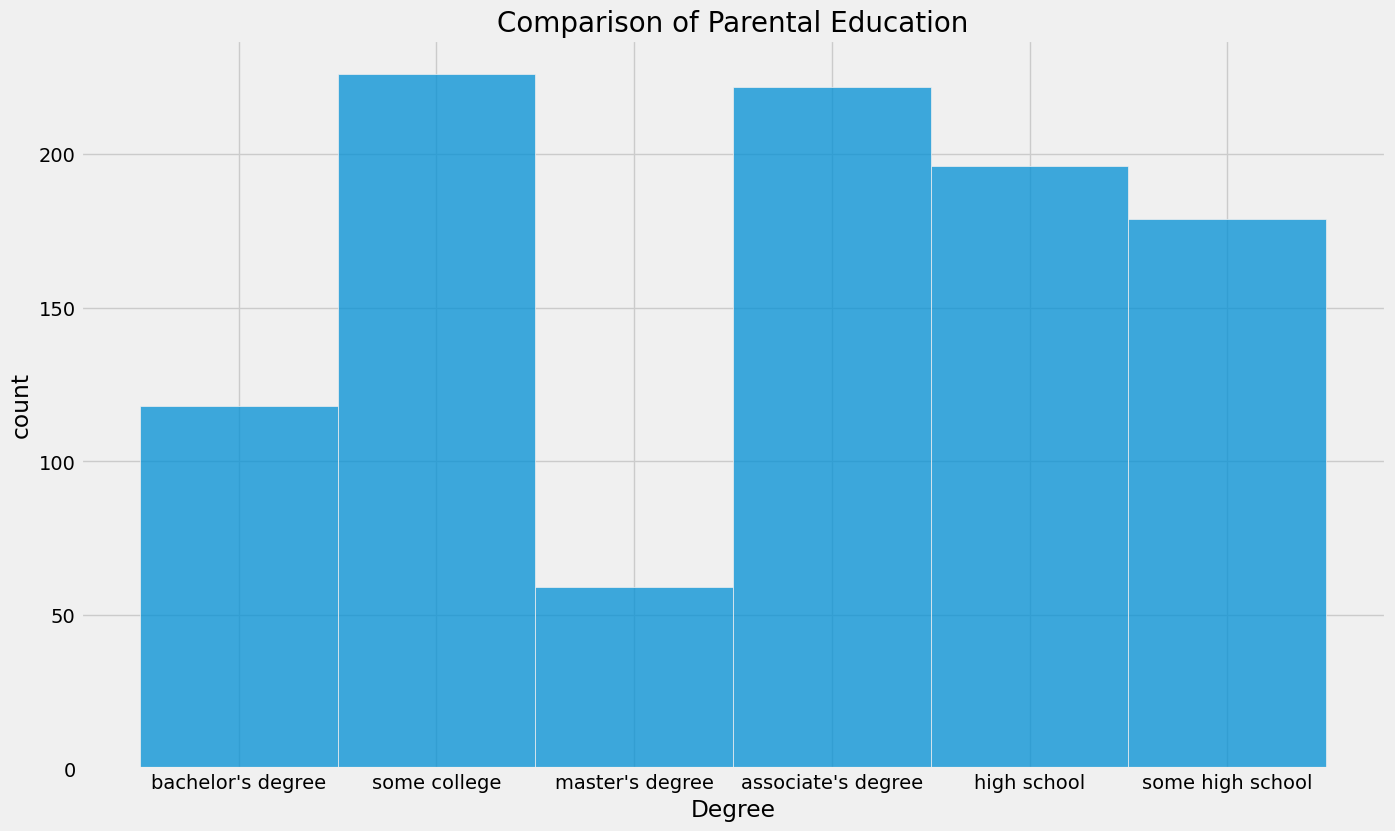

In [18]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.histplot(df["parental level of education"], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()


In [19]:
print (df.groupby('parental level of education')['math score'].median())
print (df.groupby('parental level of education')['reading score'].median())
print (df.groupby('parental level of education')['writing score'].median())

parental level of education
associate's degree    67.0
bachelor's degree     68.0
high school           63.0
master's degree       73.0
some college          67.5
some high school      65.0
Name: math score, dtype: float64
parental level of education
associate's degree    72.5
bachelor's degree     73.0
high school           66.0
master's degree       76.0
some college          70.5
some high school      67.0
Name: reading score, dtype: float64
parental level of education
associate's degree    70.5
bachelor's degree     74.0
high school           64.0
master's degree       75.0
some college          70.0
some high school      66.0
Name: writing score, dtype: float64


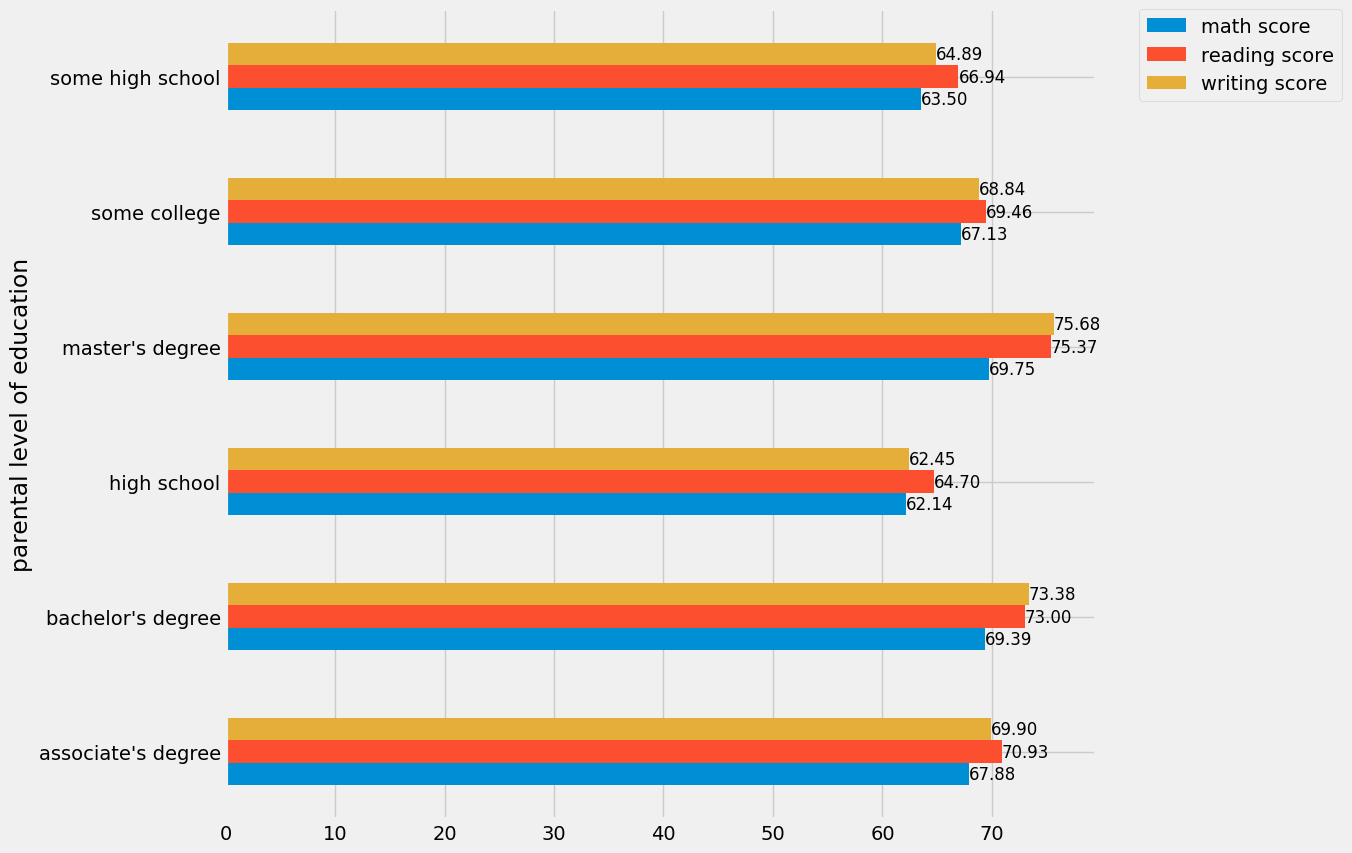

In [20]:
df_grouped = df.groupby('parental level of education').mean(numeric_only = True)
ax = df_grouped.plot(kind='barh', figsize=(10, 10))
for bar in ax.patches :
     ax.text(bar.get_width(), 
            bar.get_y() + bar.get_height()/2,  
            f'{bar.get_width():.2f}',
            va='center', ha='left', fontsize=12, color='black')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

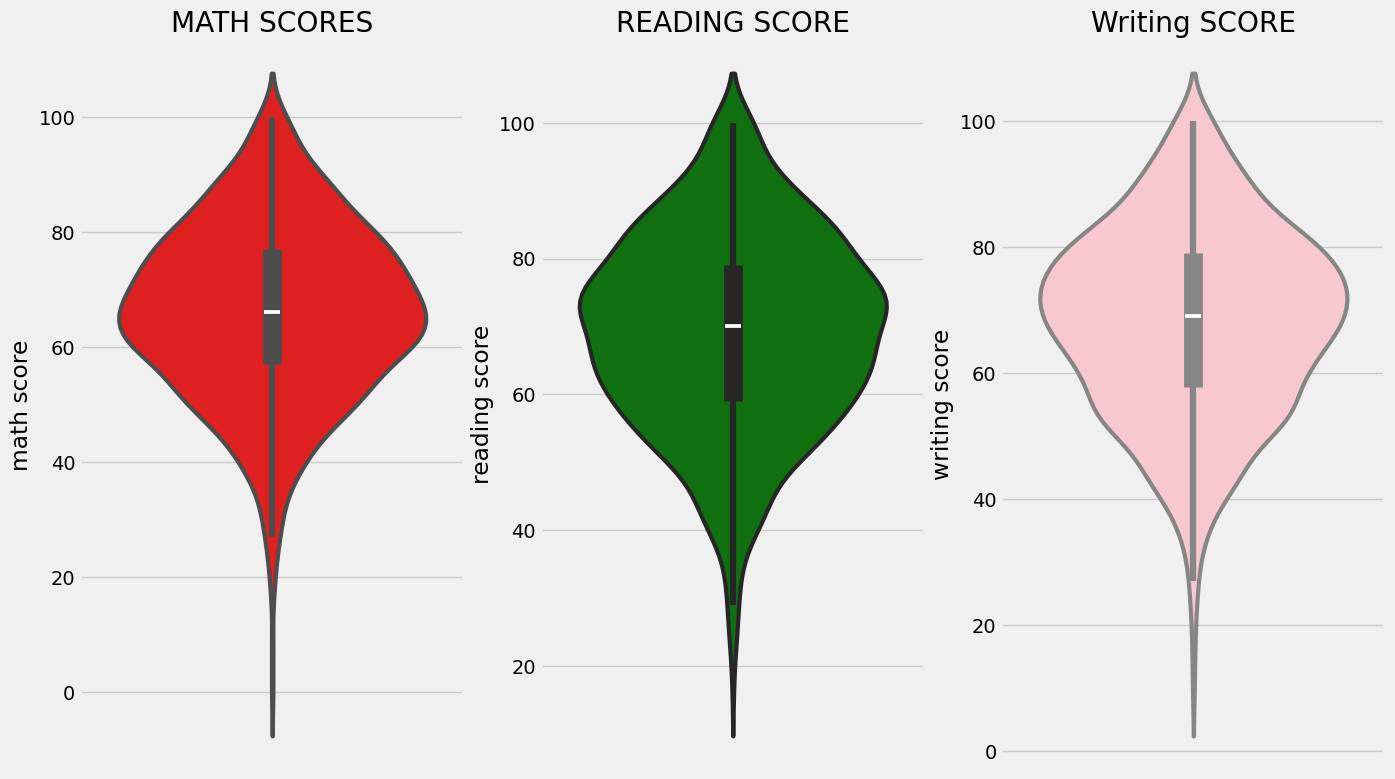

In [21]:
figsize  = (15,8)
plt.subplot(1,3,1)
plt.title('MATH SCORES') 
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,3,3)
plt.title('Writing SCORE')
sns.violinplot(y='writing score',data=df,color='pink',linewidth=3)
plt.show()


# Lets Create a Model 


In [32]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(columns="math score",axis=1)
y = df["math score"]

In [34]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( [ ("OneHotEncoder", oh_transformer, cat_features), ("StandardScaler", numeric_transformer, num_features), ] ) 
X = preprocessor.fit_transform(X)

In [35]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [38]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Squared Error: 0.0781
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.8080
- Mean Squared Error: 7.8080
- Mean Absolute Error: 6.2550
Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2626
- Mean Squared Error: 5.1193
- Mean Absolute Error: 1.8163
- R2 Score: 0.9773
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0269
- Mean Squared Error: 6.0269
- Mean Absolute Error: 4.6690
AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7729
- Mean Squared Error: 33.3263
- Mean Absolute Error: 4.7164
- R2 Score: 0.8522
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0784
- Mean Squared Error: 6.0784
- Mean Absolute Error: 4.7113


In [39]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(models)):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    model.fit(X_train, y_train)  # Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print results
    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))  # Fixed copy-paste mistake
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2)) 
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Squared Error: 0.0781
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.3415
- Mean Squared Error: 69.5800
- Mean Absolute Error: 6.6400
- R2 Score: 0.7141


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.3257
- Mean Squared Error: 5.4090
- Mean Absolute Error: 1.8530
- R2 Score: 0.9760
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0129
- Mean Squared Error: 36.1552
- Mean Absolute Error: 4.6047
- R2 Score: 0.8514


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8935
- Mean Squared Error: 34.7339
- Mean Absolute Error: 4.7862
- R2 Score: 0.8459
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0643
- Mean Squared Error: 36.7758
- Mean Ab

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define evaluation function
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    return mae, mse, rmse, r2

# Define parameter grid
param_grid = {
    "Decision Tree": {
        "max_depth": [3, 5, 7],
        "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
    },
    "Random Forest Regressor": {
        'n_estimators': [8, 16, 32, 64, 128, 256],
        "max_depth": [3, 5, 7]
    },
    "AdaBoost Regressor": {
        'learning_rate': [0.1, 0.01, 0.5, 0.001],
        'n_estimators': [8, 16, 32, 64, 128, 256]
    }
}

# Model list (already defined earlier)
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Grid Search + Evaluation
for model_name, model in models.items():
    print(f"\n🔍 Performing Grid Search for {model_name}...")
    scorer = make_scorer(r2_score)

    # Grid search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid[model_name],
        scoring=scorer,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Predict
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    # Evaluate
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"\n✅ Best Parameters for {model_name}: {grid_search.best_params_}")

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    model_list.append(model_name)
    r2_list.append(model_test_r2)



🔍 Performing Grid Search for Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Best Parameters for Decision Tree: {'criterion': 'friedman_mse', 'max_depth': 5}
Model performance for Training set
- Root Mean Squared Error: 5.7173
- Mean Squared Error: 32.6874
- Mean Absolute Error: 4.6396
- R2 Score: 0.8550
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5400
- Mean Squared Error: 42.7716
- Mean Absolute Error: 4.9315
- R2 Score: 0.8242

🔍 Performing Grid Search for Random Forest Regressor...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

✅ Best Parameters for Random Forest Regressor: {'max_depth': 7, 'n_estimators': 256}
Model performance for Training set
- Root Mean Squared Error: 4.1569
- Mean Squared Error: 17.2801
- Mean Absolute Error: 3.3639
- R2 Score: 0.9234
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7867
- Mean Squared Error: 33.4857

 # Results 

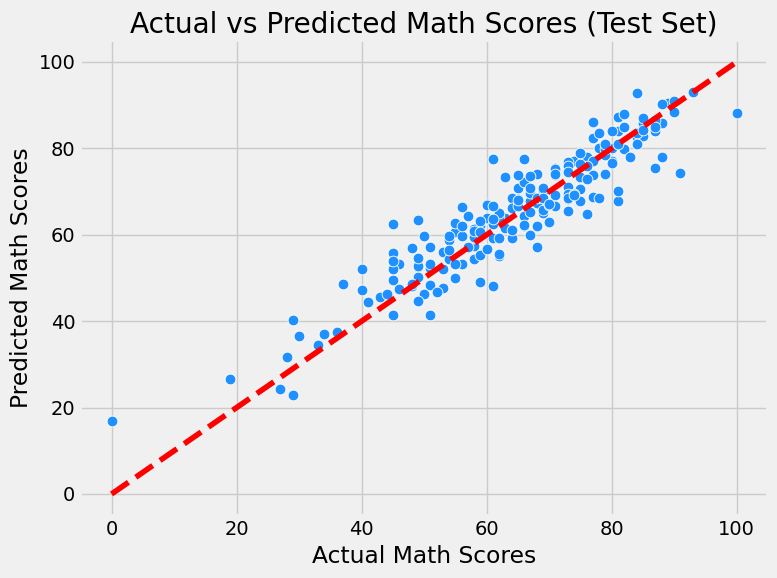

In [43]:
# Predict with best model (Random Forest)
best_model = RandomForestRegressor(max_depth=7, n_estimators=256)
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, color="dodgerblue", s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
import joblib

# Save the model
joblib.dump(best_model, "random_forest_math_score_model.pkl")
print("✅ Model saved as random_forest_math_score_model.pkl")


✅ Model saved as random_forest_math_score_model.pkl
